## Plot the visualizations from the script

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from plotnine import *

### Load the output adata

In [2]:
ad = sc.read_h5ad("/p/project1/hai_fzj_bda/koenig8/ot/visualize_alpha/output_normal/adata_out.h5py")
ad

/p/project1/hai_fzj_bda/koenig8/jupyter/kernels/opt_transport/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


AnnData object with n_obs × n_vars = 50000 × 1536
    obs: 'patch_id', 'brain_area', 'patchsize', 'x_st', 'y_st', 'z_st', 'brain_section_label', 'section', 'test_set', 'val_set', 'train_set', 'image_id', 'center_ccf', 'pixel_coord', 'distance', 'nearest_ST', 'nearest_cell_id', 'target_atlas_plate', 'distance_new', 'x', 'y', 'z', 'image_nr', 'group', 'slice', 'in_sample', 'batch'
    uns: 'brain_area_scores', 'neighbors', 'target_f1', 'translation_scores', 'umap'
    obsm: '0.010_umap', 'X_translated', 'X_umap', 'brain_area_onehot', 'brain_area_similarities', 'pca_embedding', 'pca_plus_slides', 'pca_plus_slides_scaled', 'uni_embedding', 'uni_pca_95', 'uni_pca_plus_coords'
    obsp: 'connectivities', 'distances'

### Check how many alphas were tested

In [4]:
ad.uns["brain_area_scores"]

{'0.010': np.float64(0.8743136559173061)}

In [14]:
ad.uns["translation_scores"]

{'0.010': np.float64(0.10261469120089846)}

In [15]:
ad.uns["target_f1"]

np.float64(0.7936503238758195)

In [ ]:
ad.uns["translatio"]

==> Only one... Check the UMAP

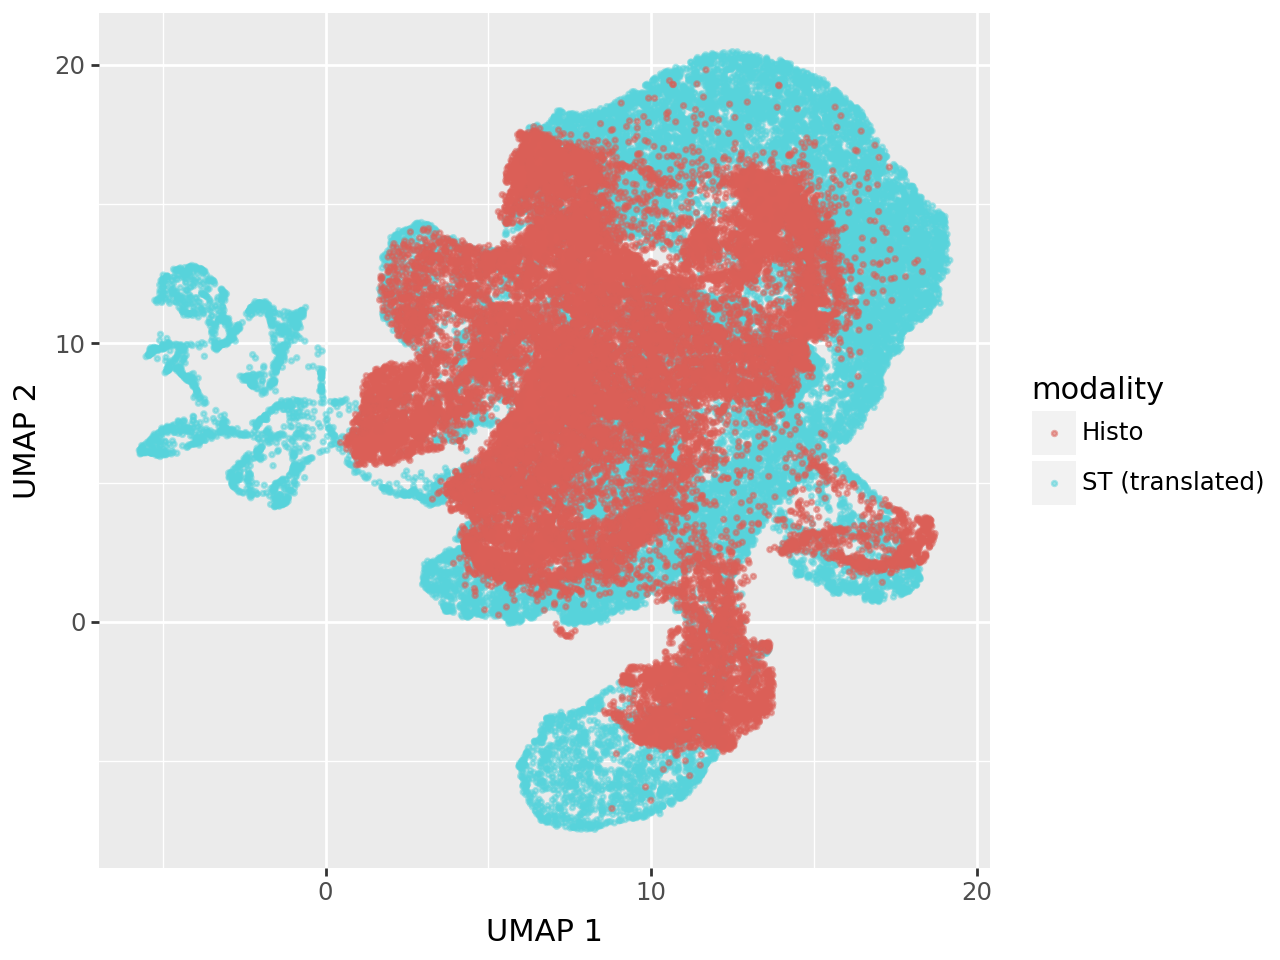

In [12]:
umap_frame = pd.DataFrame(ad.obsm['0.010_umap'], columns = ("UMAP 1", "UMAP 2"))
umap_frame["modality"] = ad.obs["batch"].to_numpy()
umap_frame["brain area"] = ad.obs["brain_area"].to_numpy()

plot = ggplot(umap_frame, aes(x="UMAP 1", y="UMAP 2", color = "modality")) + geom_point(size = 0.5, alpha = 0.5)
plot

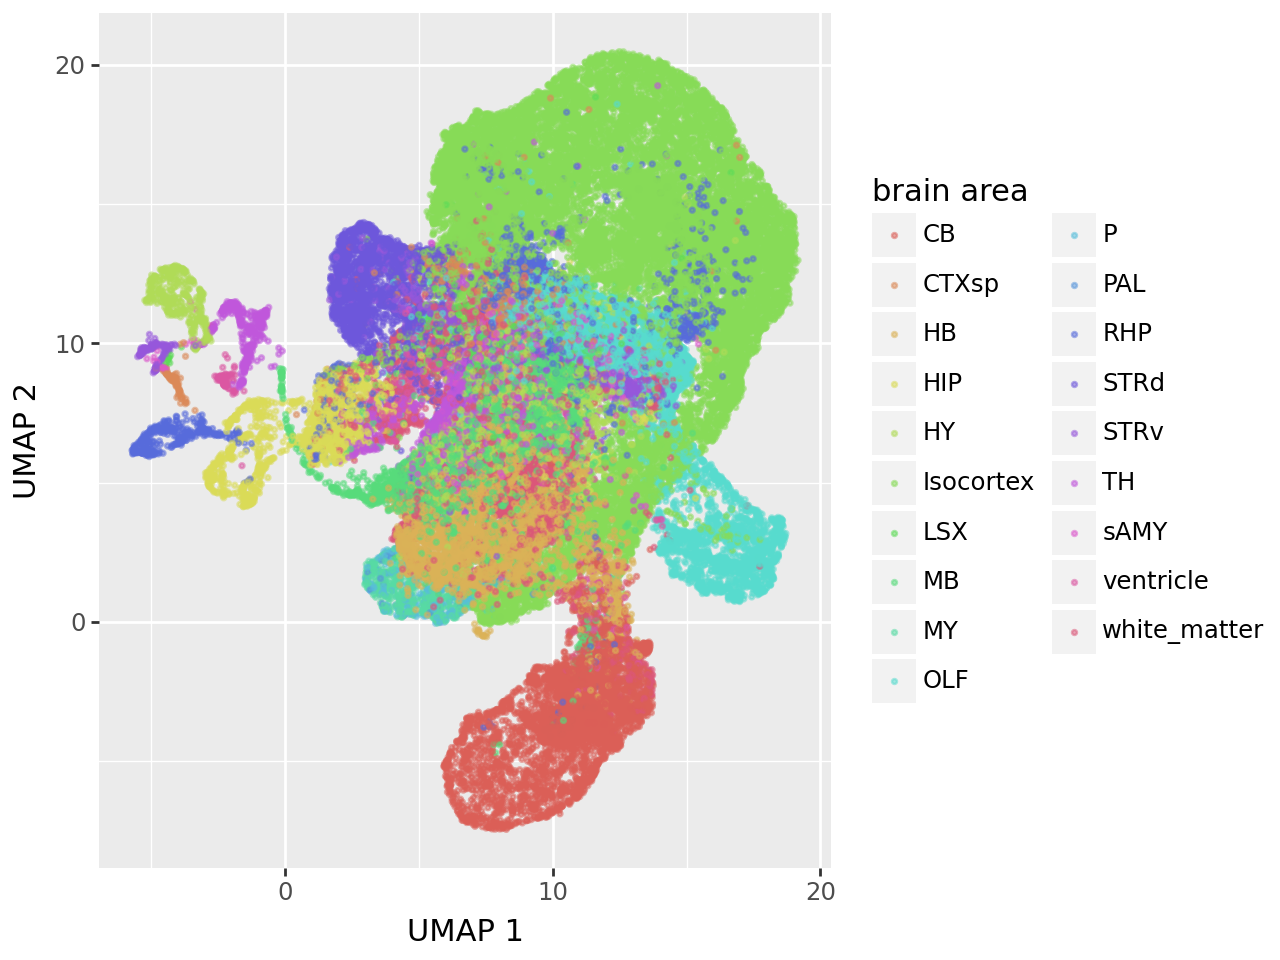

In [13]:
ggplot(umap_frame, aes(x="UMAP 1", y="UMAP 2", color = "brain area")) + geom_point(size = 0.5, alpha = 0.5)